In [1]:
%config Completer.use_jedi = False

import numpy as np
import matplotlib.pyplot as plt
import folium

z = 1500

import matplotlib
cmap = matplotlib.cm.get_cmap("viridis")

import branca.colormap as cm
bcmap = cm.linear.viridis.scale(vmin=0, vmax=z).to_step(n=4)
bcmap.caption = 'my color scale'
bcmap

# Create random data with missing values

[[1000. 1000. 1000. ... 1500. 1500. 1500.]
 [1000. 1000. 1000. ...    0.    0. 1500.]
 [1000. 1000. 1000. ...    0.    0. 1500.]
 ...
 [1500.    0.    0. ...    0.    0. 1500.]
 [1500.    0.    0. ...    0.    0. 1500.]
 [1500. 1500. 1500. ... 1500. 1500. 1500.]]


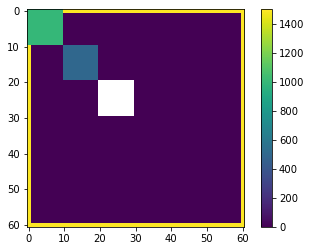

In [2]:
image = np.zeros((61, 61))
image[0, :] = z
image[60, :] = z
image[:, 0] = z
image[:, 60] = z
image[:10,:10] = 1000
image[10:20,10:20] = 500
image[20:30,20:30] = np.nan

print(image)

plt.imshow(image, cmap=cmap)
plt.colorbar()

# with matplotlib.cm 
- Fill values transparent
- Can't easily add colormap to interactive map (maybe with ColorLine)

In [3]:
# needs normed_data (no need to mask)

m = folium.Map([0, 0], zoom_start=2, scroll=False)#, width=100,height=100)
folium.raster_layers.ImageOverlay(
    image=image/z,
    bounds=[[0, -60], [60, 60]],  
    colormap=cmap,
).add_to(m)

# maybe we could do a colormap based on ColorLine
folium.ColorLine(positions=[[70,-60],[70,0], [70,60]], colors=[0,1], colormap=['r','g'], weigth=10).add_to(m)

m

In [4]:
data = np.ma.masked_where(np.isnan(image), image)
print(data.min(), data.max())
normed_data = (data - data.min()) / (data.max() - data.min())
colored_data = cmap(normed_data)

m = folium.Map([0, 0], zoom_start=2, scroll=False)#, width=100,height=100)

folium.raster_layers.ImageOverlay(
    image=colored_data,
    bounds=[[0, -60], [60, 60]],      
).add_to(m)


m


0.0 1500.0


# with branca colormap
- Fill values NaNs are plotted as higher than color scale
- Nice and convenient adding colorscale to folium map

In [5]:
# doesn't need normed data but bad fill values!

m = folium.Map([0, 0], zoom_start=2, scroll=False)#, width=100,height=100)
folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],      
    colormap=lambda x:bcmap.rgba_floats_tuple(x),   
).add_to(m)
bcmap.add_to(m)
m


# with both
- convert data to colors according to bcmap
- Fill values transparent
- Nicely add colorscale to map

In [6]:
f = np.vectorize(bcmap.rgba_floats_tuple)
aux = f(image)
colored_data = np.ones((image.shape[0], image.shape[1],4))
for i in range(len(aux)):
    aux[i][np.isnan(image)] = 0
    colored_data[:,:,i] = aux[i]    

print(colored_data.shape)
print(colored_data[0,0,:])
print(colored_data[1,1,:]) # same as before
print(colored_data[15,15,:]) # different color
print(colored_data[25,25,:])  # nans

m = folium.Map([0, 0], zoom_start=2, scroll=False)#, width=100,height=100)
folium.raster_layers.ImageOverlay(
    image=colored_data,
    bounds=[[0, -60], [60, 60]],      
).add_to(m)
bcmap.add_to(m)
m


(61, 61, 4)
[0.21045752 0.71764706 0.47189542 1.        ]
[0.21045752 0.71764706 0.47189542 1.        ]
[0.19215686 0.40522876 0.55424837 1.        ]
[0. 0. 0. 0.]


/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2192: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
